In [17]:
using DelimitedFiles, Plots, Statistics, LinearAlgebra

## 1. Energy Calibration

In [28]:
#Rebinning the data - yikes
function rebin(data::Matrix, N::Int64)
    """N is the number of bins in the old data which get mapped to the new data
    """
    mod(N,2) == 0 ? throw(AssertionError("even N bad")) : nothing
    numBins = floor(Int64, 32768/N)
    rebinned = zeros(Float64, numBins, 2)
    
    for i=1:numBins
        j = N*i - 1
        rebinned[i, 1] = i-1
        rebinned[i, 2] = sum(data[j-k, 2] for k = range(-Int((N-1)/2), Int((N-1)/2), step=1))
    end
    
    return rebinned
end

rebin (generic function with 1 method)

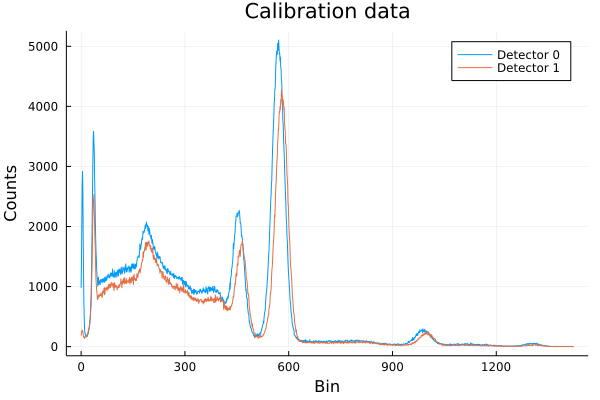

In [27]:
#Calibration - day 1:
N = 23
rebinned0 = rebin(readdlm("Day 3/Day 3/Cs-Calibration_001_eh_0.dat", Float64), N)
plot(rebinned0[:,1], rebinned0[:,2], xlabel="Bin", ylabel="Counts", title="Calibration data", label="Detector 0")

rebinned1 = rebin(readdlm("Day 3/Day 3/Cs-Calibration_001_eh_1.dat", Float64), N)
plot!(rebinned1[:,1], rebinned1[:,2], label="Detector 1")

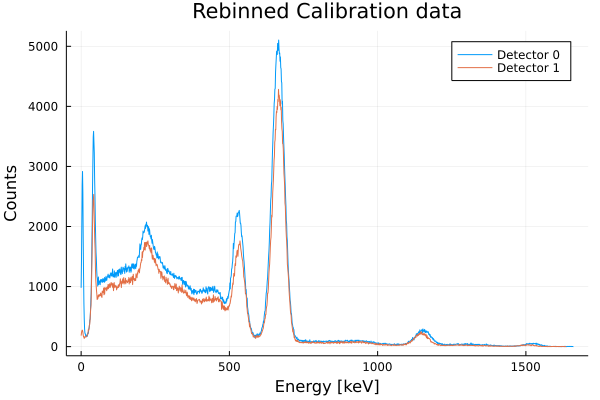

In [59]:
#Location of peaks
ch662_0 = rebinned0[findmax(rebinned0[500:700, 2])[2] + 500, 1]
ch662_1 = rebinned1[findmax(rebinned1[500:700, 2])[2] + 500, 1]

ch511_0 = rebinned0[findmax(rebinned0[300:500, 2])[2] + 300, 1]
ch511_1 = rebinned1[findmax(rebinned1[300:500, 2])[2] + 300, 1]

ch32_0 = rebinned0[findmax(rebinned0[1:200, 2])[2] + 1, 1]
ch32_1 = rebinned0[findmax(rebinned1[1:200, 2])[2] + 1, 1]

#Best fit line
A0 = [1 ch662_0; 1 ch511_0; 1 ch32_0]
b0 = [662; 511; 32]

A1 = [1 ch662_1; 1 ch511_1; 1 ch32_1]
b1 = b0
keVperChannel0 = (inv(A0'*A0)*A0'*b0)[2]
keVperChannel1 = (inv(A1'*A1)*A1'*b1)[2]

plot(rebinned0[:,1]*keVperChannel0, rebinned0[:,2], xlabel="Energy [keV]", ylabel="Counts", title="Rebinned Calibration data", label="Detector 0")
plot!(rebinned1[:,1]*keVperChannel1, rebinned1[:,2], label="Detector 1")

## 2. Scattering Angle Data

In [31]:
#Part 2
target15 = rebin(readdlm("Day 3/Day 3/Coincidence-15deg_001_eh_0.dat", Float64), N)
scatter15 = rebin(readdlm("Day 3/Day 3/Coincidence-15deg_001_eh_1.dat", Float64), N)

target30 = rebin(readdlm("Day 3/Day 3/Coincidence-30deg_001_eh_0.dat", Float64), N)
scatter30 = rebin(readdlm("Day 3/Day 3/Coincidence-30deg_001_eh_1.dat", Float64), N)

target60 = rebin(readdlm("Day 3/Day 3/Coincidence-60deg_001_eh_0.dat", Float64), N)
scatter60 = rebin(readdlm("Day 3/Day 3/Coincidence-60deg_001_eh_1.dat", Float64), N)

target90 = rebin(readdlm("Day 3/Day 3/Coincidence-90deg_001_eh_0.dat", Float64), N)
scatter90 = rebin(readdlm("Day 3/Day 3/Coincidence-90deg_001_eh_1.dat", Float64), N)

target120 = rebin(readdlm("Day 3/Day 3/Coincidence-120deg_001_eh_0.dat", Float64), N)
scatter120 = rebin(readdlm("Day 3/Day 3/Coincidence-120deg_001_eh_1.dat", Float64), N)

target150 = rebin(readdlm("Day 3/Day 3/Coincidence-150deg_001_eh_0.dat", Float64), N)
scatter150 = rebin(readdlm("Day 3/Day 3/Coincidence-150deg_001_eh_1.dat", Float64), N)

target170 = rebin(readdlm("Day 3/Day 3/Coincidence-170deg_001_eh_0.dat", Float64), N)
scatter170 = rebin(readdlm("Day 3/Day 3/Coincidence-170deg_001_eh_1.dat", Float64), N)

target15[:,1] = target15[:,1]*keVperChannel0
scatter15[:,1] = scatter15[:,1]*keVperChannel1

target30[:,1] = target30[:,1]*keVperChannel0
scatter30[:,1] = scatter30[:,1]*keVperChannel1

target60[:,1] = target60[:,1]*keVperChannel0
scatter60[:,1] = scatter60[:,1]*keVperChannel1

target90[:,1] = target90[:,1]*keVperChannel0
scatter90[:,1] = scatter90[:,1]*keVperChannel1

target120[:,1] = target120[:,1]*keVperChannel0
scatter120[:,1] = scatter120[:,1]*keVperChannel1

target150[:,1] = target150[:,1]*keVperChannel0
scatter150[:,1] = scatter150[:,1]*keVperChannel1

target170[:,1] = target170[:,1]*keVperChannel0
scatter170[:,1] = scatter170[:,1]*keVperChannel1


plot(target150[:,1], target150[:,2], xlabel="Energy [keV]", ylabel = "Counts", title="150 Degree scatter data", label="Target")
plot!(scatter150[:,1], scatter150[:,2], label="Scatter")
savefig("150deg.png")

Target Peak Energy:  526.2 ± 0.5 keV
Scatter Peak Energy: 205.8 ± 0.5 keV
Target + Scatter:    732.0 ± 0.7 keV
Target Counts:       9536.0
Scatter Counts:      19998.0


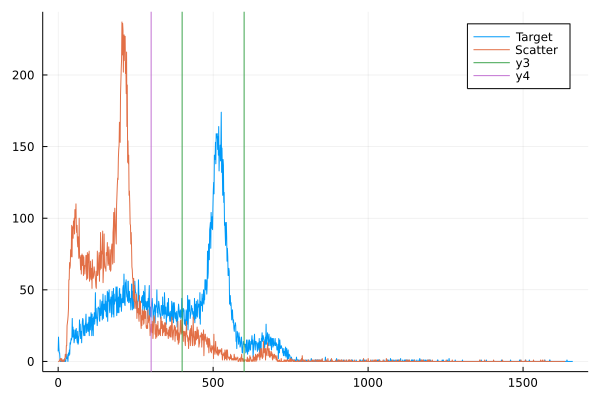

In [32]:
target, scatter = target170, scatter170
leftTarget, rightTarget = 400, 600
rightScatter = 300

targetPeak = target[findmax(target[:,2])[2],1]
scatterPeak = scatter[findmax(scatter[:, 2])[2],1]

σE_target = std(target[leftTarget:rightTarget, 2])
σE_scatter = std(scatter[1:rightTarget, 2])

targetCounts = sum(target[leftTarget:rightTarget, 2])
scatterCounts = sum(scatter[1:rightScatter, 2])

ETarget_error =  σE_target/sqrt(targetCounts)
EScatter_error = σE_scatter/sqrt(targetCounts)
ETotal_error = sqrt(ETarget_error^2 + EScatter_error^2)

println("Target Peak Energy:  ", round(targetPeak, digits=1)," ± ", round(ETarget_error, digits=1), " keV")
println("Scatter Peak Energy: ", round(scatterPeak,digits=1)," ± ", round(EScatter_error,digits=1), " keV")
println("Target + Scatter:    ", round(scatterPeak + targetPeak, digits=1), " ± ", round(ETotal_error, digits=1), " keV") 
println("Target Counts:       ", targetCounts)
println("Scatter Counts:      ", scatterCounts)

plot(target[:,1], target[:,2], label="Target")
plot!(scatter[:,1], scatter[:,2], label="Scatter")
vline!([leftTarget, rightTarget])
vline!([rightScatter])

Angle | Count Time | Target Peak Energy | Scatter Peak Energy | Target + Scatter Energy | Target Peak Counts |  Scatter Counts |
------|------------|--------------------|---------------------|-------------------------|-------------------|-----------------|
15  | 8:14  | 67.7  ± 0.5 | 618.4 ± 0.1 | 686.1 ± 0.5 | 15230 | 19284 |
30  | 8:30  | 149.3 ± 0.3 | 583.4 ± 0.1 | 732.7 ± 0.4 | 15644 | 18706 |
60  | 10:52 | 278.9 ± 0.2 | 439.9 ± 0.1 | 718.7 ± 0.3 | 10771 | 12959 |
90  | 15:25 | 402.5 ± 0.3 | 327.9 ± 0.2 | 730.4 ± 0.4 | 9680 | 12288 |
120 | 20:19 | 481.9 ± 0.5 | 259.0 ± 0.4 | 740.9 ± 0.6 | 9720 | 13866 |
150 | 20:22 | 506.4 ± 0.7 | 220.5 ± 0.5 | 726.9 ± 0.8 | 9725 | 15407 | 
170 | 20:17 | 526.2 ± 0.5 | 208.9 ± 0.5 | 735.1 ± 0.7 | 9536 | 19998 |

Incident energy: 669.6891019916571
Electron mass: 616.5221052670341


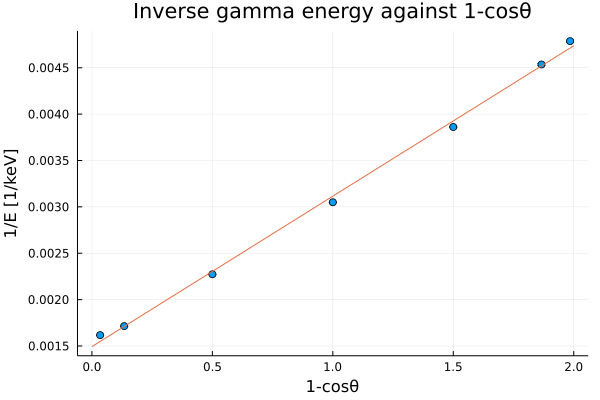

In [62]:
Ee = [67.7, 149.3, 278.9, 402.5, 481.9, 506.4, 526.2] #Target peak - Recoil Electron
σe = [0.5, 0.3, 0.2, 0.3, 0.5, 0.7, 0.5]

Eγ′= [618.4, 583.4, 439.9, 327.9, 259.0, 220.5, 208.9] #Scatter peak - Deflected gamma
σγ′ = [0.1, 0.1, 0.1, 0.2, 0.4, 0.5, 0.5]
σE = σγ′./(Eγ′.^2)

θ = [15, 30, 60, 90, 120, 150, 170].*π/180

#Best Fit:
A = [ones(7,1) reshape(-cos.(θ) .+ 1, (7,1))]
b = reshape(Eγ′.^(-1),(7,1))
slope = ((inv(A'*A)*A')*b)
println("Incident energy: ", 1/slope[1])
println("Electron mass: ", 1/slope[2])

plot((-cos.(θ) .+ 1), Eγ′.^(-1), seriestype=:scatter, title="Inverse gamma energy against 1-cosθ", xlabel="1-cosθ", ylabel="1/E [1/keV]", label="Observed", yerror=σE)
plot!(0:2, slope[2]*(0:2) .+ slope[1], label="Fit", legend=false)


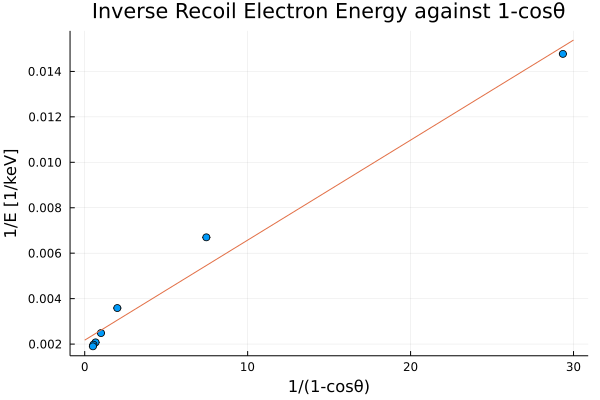

In [63]:
plot((-cos.(θ) .+ 1).^(-1), Ee.^(-1), seriestype=:scatter, title="Inverse Recoil Electron Energy against 1-cosθ", xlabel="1/(1-cosθ)", ylabel="1/E [1/keV]", label="Observed", yerror=σE)
A = [ones(7,1) reshape(   (-cos.(θ) .+1 ).^(-1), (7,1)  )]
b = reshape(Ee.^(-1), (7,1))
slope = inv(A'*A)*A'*b
plot!(0:30, slope[2]*(0:30) .+ slope[1], label="Fit", legend=false)

## 3. Klein-Nishina Cross Section

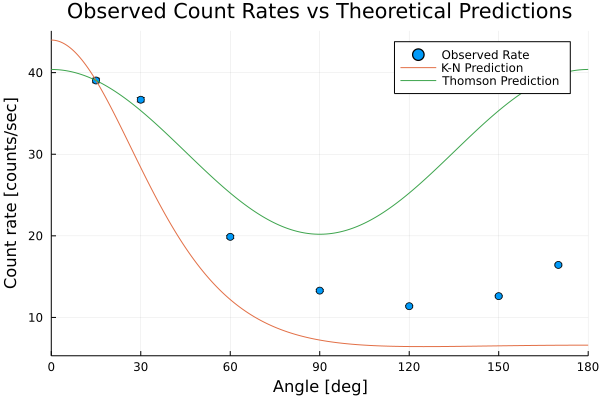

In [58]:
#Count rates
times = [8*60+14, 8*60+30, 10*60+52, 15*60+25, 20*60+19, 20*60+22, 20*60+17]
countsTarget = [15230, 15644, 10771, 9680, 9720, 9725, 9563]
countsScatter = [19284, 18706, 12959, 12288, 13866, 15407, 19998]
θdeg = Int.(round.(θ.*180/π))

dσdΩ(θ) = (E(θ)/662)^2*(E(θ)/662 + 662/E(θ) - (sin(θ))^2)
dσdΩT(θ) = 1+cos(θ)^2
E(θ) = (662)/(1+(662/511)*(1-cos(θ)))

C = (countsScatter[1]/times[1])/(dσdΩ(15*π/180))
CT = (countsScatter[1]/times[1])/dσdΩT(θ[1])
σrates = sqrt.(countsScatter)./times

plot(θdeg, countsScatter./times, seriestype=:scatter, xlims=(0,180), yerror=σrates, label="Observed Rate")
plot!(0:.01:180, C*dσdΩ.((0:.01:180).*(π/180)), linewidth =1, label="K-N Prediction")
plot!(0:.01:180, CT*dσdΩT.((0:.01:180).*(π/180)), linewidth =1, label="Thomson Prediction")
title!("Observed Count Rates vs Theoretical Predictions")
xlabel!("Angle [deg]")
ylabel!("Count rate [counts/sec]")
